In [268]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [269]:
file_path = "../Data/heart.csv"
df = pd.read_csv(file_path)

# Split features & target
X = df.drop(columns=["target"])
y = df["target"]


In [270]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [271]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [ ]:
# Model Depth
model_depth = nn.Sequential(
    nn.Linear(X_train.shape[1], 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Linear(4, 2)
)

# Model Breadth
model_breadth = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 2)
)

In [273]:
def train_model_history(model, X_train, y_train, X_test, y_test, epochs=50, lr=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    history = {"train_loss": [], "test_loss": [], "test_acc": [], "train_acc":[]}

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        _, train_prediction = torch.max(outputs, 1)
        train_acc = (train_prediction == y_train).sum().item() / len(y_train)

        loss.backward()
        optimizer.step()

        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test).item()
            _, predicted = torch.max(test_outputs, 1)
            acc = (predicted == y_test).sum().item() / len(y_test)

        history["train_loss"].append(loss.item())
        history["test_loss"].append(test_loss)
        history["train_acc"].append(train_acc)
        history["test_acc"].append(acc)

    return history

In [274]:
history_depth = train_model_history(model_depth, X_train, y_train, X_test, y_test, epochs=1000, lr=0.1)
history_breadth = train_model_history(model_breadth, X_train, y_train, X_test, y_test, epochs=1000, lr=0.1)


In [275]:
history_depth['test_acc'][-1]

0.9512195121951219

In [276]:
history_breadth['test_acc'][-1]

0.9853658536585366

In [277]:
import matplotlib.pyplot as plt


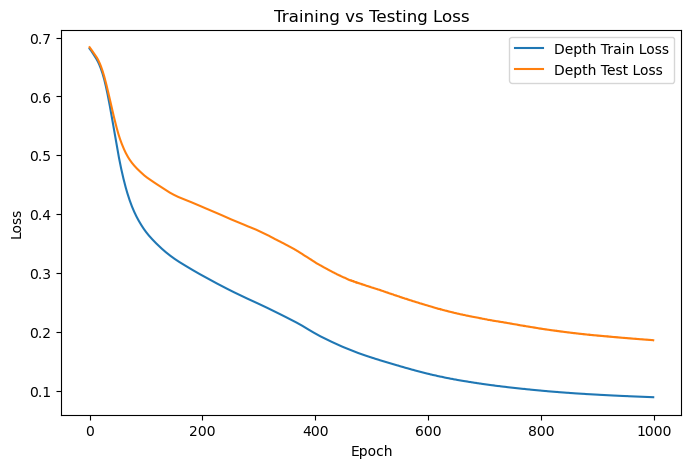

In [278]:
plt.figure(figsize=(8,5))
plt.plot(history_depth["train_loss"], label="Depth Train Loss")
plt.plot(history_depth["test_loss"], label="Depth Test Loss")
plt.title("Training vs Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

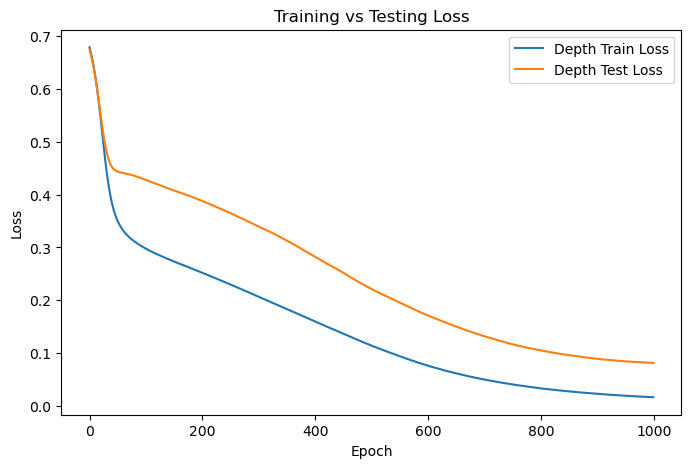

In [279]:
plt.figure(figsize=(8,5))
plt.plot(history_breadth["train_loss"], label="Depth Train Loss")
plt.plot(history_breadth["test_loss"], label="Depth Test Loss")
plt.title("Training vs Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

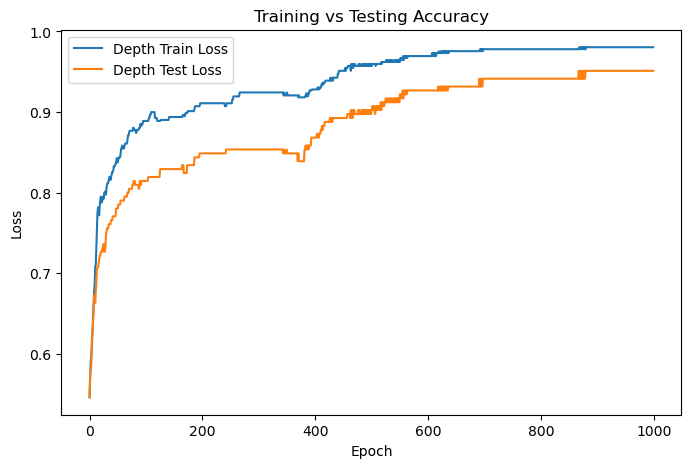

In [280]:
plt.figure(figsize=(8,5))
plt.plot(history_depth["train_acc"], label="Depth Train Loss")
plt.plot(history_depth["test_acc"], label="Depth Test Loss")
plt.title("Training vs Testing Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

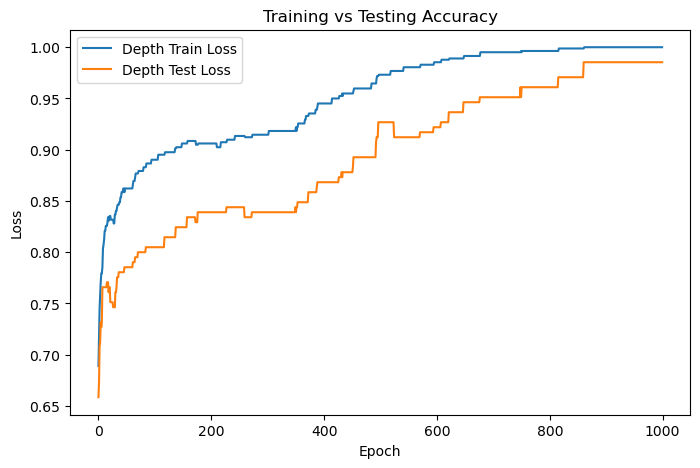

In [281]:
plt.figure(figsize=(8,5))
plt.plot(history_breadth["train_acc"], label="Depth Train Loss")
plt.plot(history_breadth["test_acc"], label="Depth Test Loss")
plt.title("Training vs Testing Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()